In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


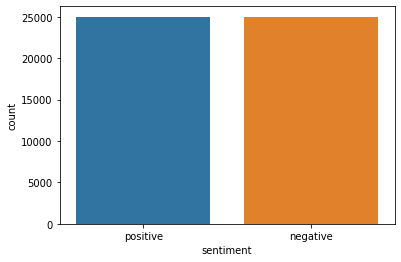

In [ ]:
sns.countplot(df['sentiment'])

In [ ]:
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
X = df['review']
y = df['sentiment']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ps = PorterStemmer()
corpus = []

for i in range(len(X)):
    #print(i)
    review = re.sub("[^a-zA-Z]"," ", X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(50000, 5000)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size=0.2 , random_state=101)

In [ ]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

In [ ]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train , Y_train)

MultinomialNB()

In [ ]:
pred = mnb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test , pred))
print(confusion_matrix(Y_test , pred))
print(classification_report(Y_test , pred))

0.8518
[[4215  744]
 [ 738 4303]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4959
           1       0.85      0.85      0.85      5041

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9995,1,1
9996,0,0
9997,0,0
9998,1,1


In [ ]:
pickle.dump(cv , open("count-Vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("Movies_Review_Classification.pkl" , "wb"))

In [ ]:
save_cv = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('Movies_Review_Classification.pkl','rb'))

In [ ]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [ ]:
sen = 'This is the wonderful movie of my life'
res = test_model(sen)
print(res)

Positive review


In [ ]:
sen = 'This is the worst movie, I have ever seen in my life'
res = test_model(sen)
print(res)

Negative review


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train , Y_train)
pred2 = gnb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test , pred2))
print(confusion_matrix(Y_test , pred2))
print(classification_report(Y_test , pred2))

0.7855
[[3959 1000]
 [1145 3896]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4959
           1       0.80      0.77      0.78      5041

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [ ]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9995,1,1
9996,0,0
9997,0,0
9998,1,1


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train , Y_train)
pred3 = bnb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test , pred3))
print(confusion_matrix(Y_test , pred3))
print(classification_report(Y_test , pred3))

0.8525
[[4279  680]
 [ 795 4246]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4959
           1       0.86      0.84      0.85      5041

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , Y_train)
pred4 = logreg.predict(X_test)
print(accuracy_score(Y_test , pred4))
print(confusion_matrix(Y_test , pred4))
print(classification_report(Y_test , pred4))

0.8894
[[4386  573]
 [ 533 4508]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4959
           1       0.89      0.89      0.89      5041

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train , Y_train)
pred5 = logreg.predict(X_test)
print(accuracy_score(Y_test , pred5))
print(confusion_matrix(Y_test , pred5))
print(classification_report(Y_test , pred5))

0.8894
[[4386  573]
 [ 533 4508]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4959
           1       0.89      0.89      0.89      5041

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

